ggsurv: Survival Curves With Ggplot2
====================================
This function produces Kaplan-Meier plots using ggplot2. 
As a first argument it needs a survfit object, created by the survival package. 
Default settings differ for single stratum and multiple strata objects.


In [ ]:

Usage
<pre><code>
ggsurv(s, CI = "def", plot.cens = TRUE, surv.col = "gg.def", 
       cens.col = "gg.def", lty.est = 1, lty.ci = 2, 
       size.est = 0.5, size.ci = size.est, cens.size = 2, 
       cens.shape = 3, back.white = FALSE, 
       xlab = "Time", ylab = "Survival", main = "")
</code></pre>
Arguments



* ***``s``***
an object of class survfit
* ***``CI``***
should a confidence interval be plotted? Defaults to TRUE for single stratum objects and FALSE for multiple strata objects.
* ***``plot.cens``***
mark the censored observations?
* ***``surv.col``***
colour of the survival estimate. Defaults to black for one stratum, and to the default ggplot2 colours for multiple strata. Length of vector with colour names should be either 1 or equal to the number of strata.
* ***``cens.col``***
colour of the points that mark censored observations.
* ***``lty.est``***
linetype of the survival curve(s). Vector length should be either 1 or equal to the number of strata.
* ***``lty.ci``***
linetype of the bounds that mark the 95% CI.
* ***``size.est``***
line width of the survival curve
* ***``size.ci``***
line width of the 95% CI
* ***``cens.size``***
point size of the censoring points
* ***``cens.shape``***
shape of the points that mark censored observations.
* ***``back.white``***
if TRUE the background will not be the default grey of ggplot2 but will be white with borders around the plot.

* ***``xlab``***
the label of the x-axis.
* ***``ylab``***
the label of the y-axis.

    main
the plot label.
Value
An object of class ggplot
Examples

In [14]:
library(ggplot2)
install.packages("GGally")
library(GGally)
library(survival)  
library(scales)

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


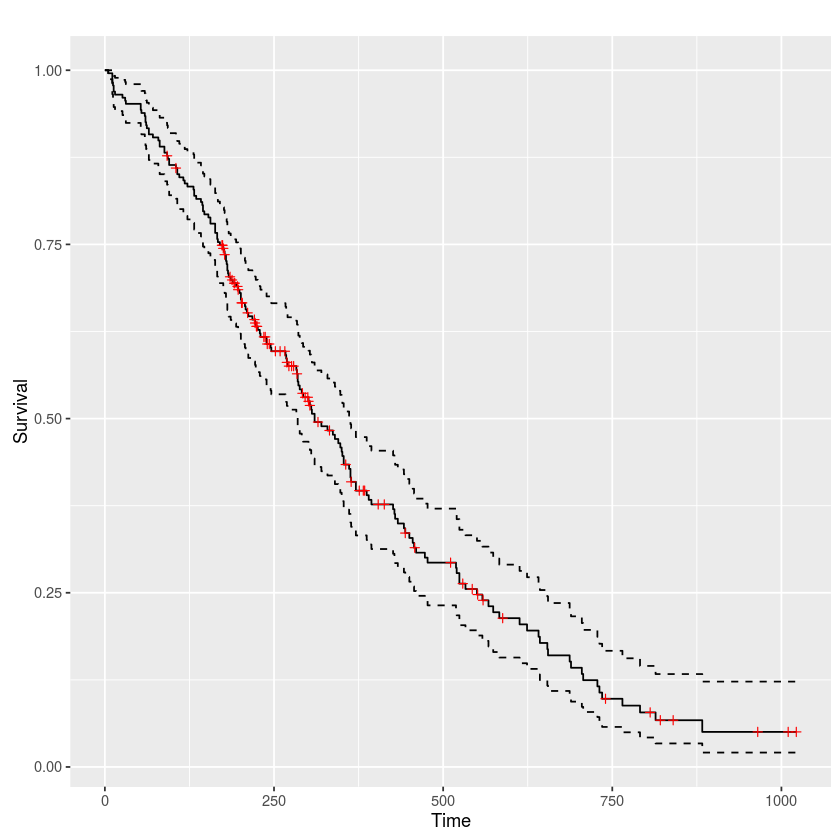

In [15]:
data(lung, package = "survival")
sf.lung <- survival::survfit(Surv(time, status) ~ 1, data = lung)
ggsurv(sf.lung)


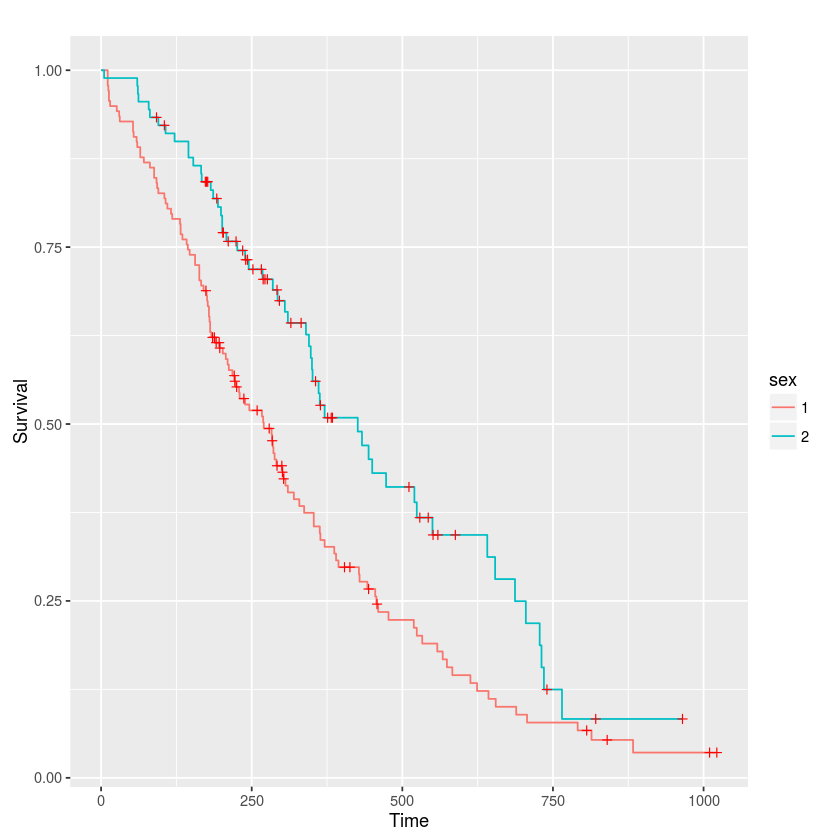

In [16]:
# Multiple strata examples
sf.sex <- survival::survfit(Surv(time, status) ~ sex, data = lung)
pl.sex <- ggsurv(sf.sex)
pl.sex


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


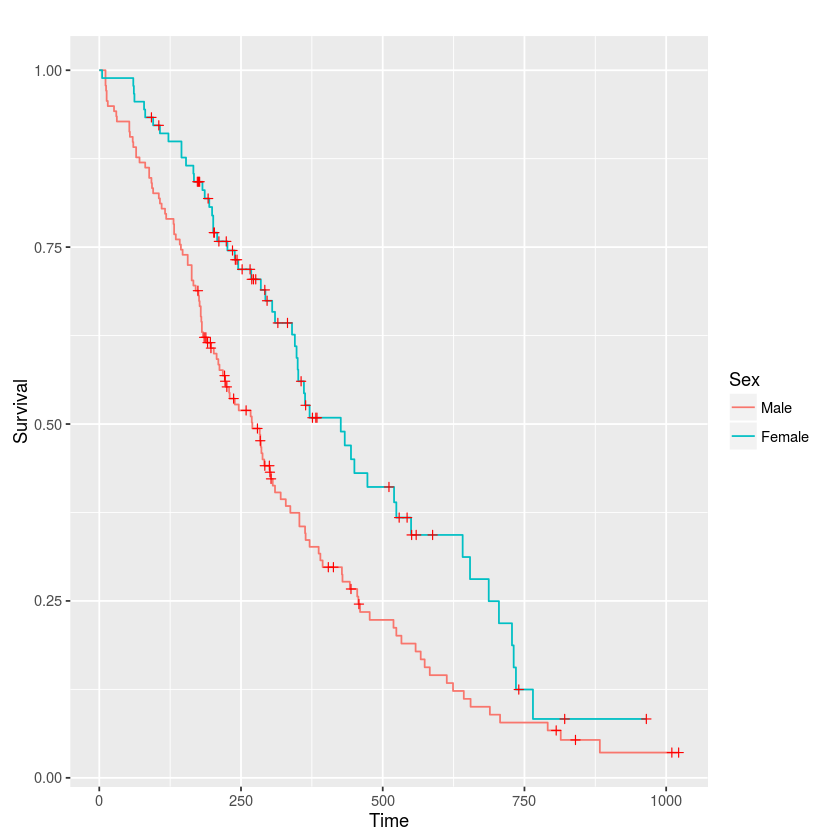

In [11]:
# Adjusting the legend of the ggsurv fit
  pl.sex +
    ggplot2::guides(linetype = FALSE) +
    ggplot2::scale_colour_discrete(
      name   = 'Sex',
      breaks = c(1,2),
      labels = c('Male', 'Female')
    )


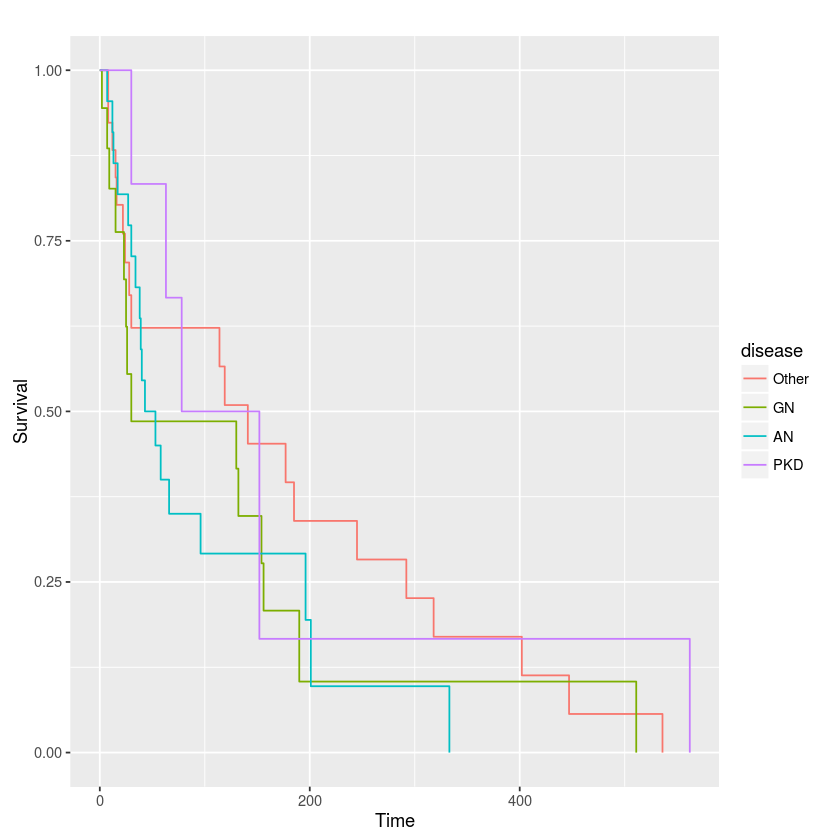

In [12]:
  # We can still adjust the plot after fitting
  data(kidney, package = "survival")
  sf.kid <- survival::survfit(Surv(time, status) ~ disease, data = kidney)
  pl.kid <- ggsurv(sf.kid, plot.cens = FALSE)
  pl.kid


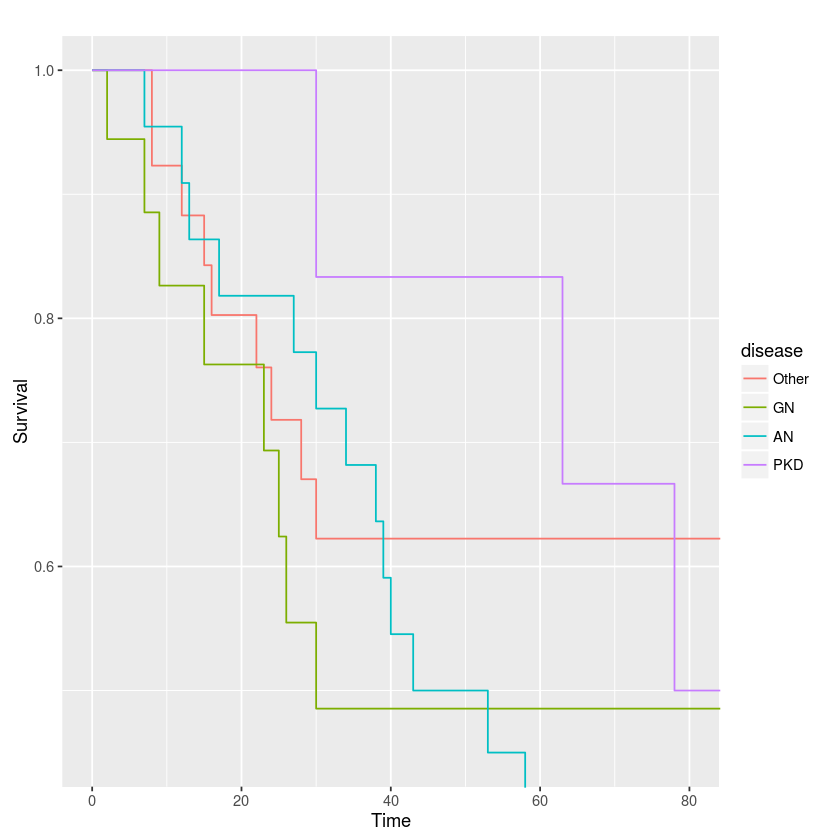

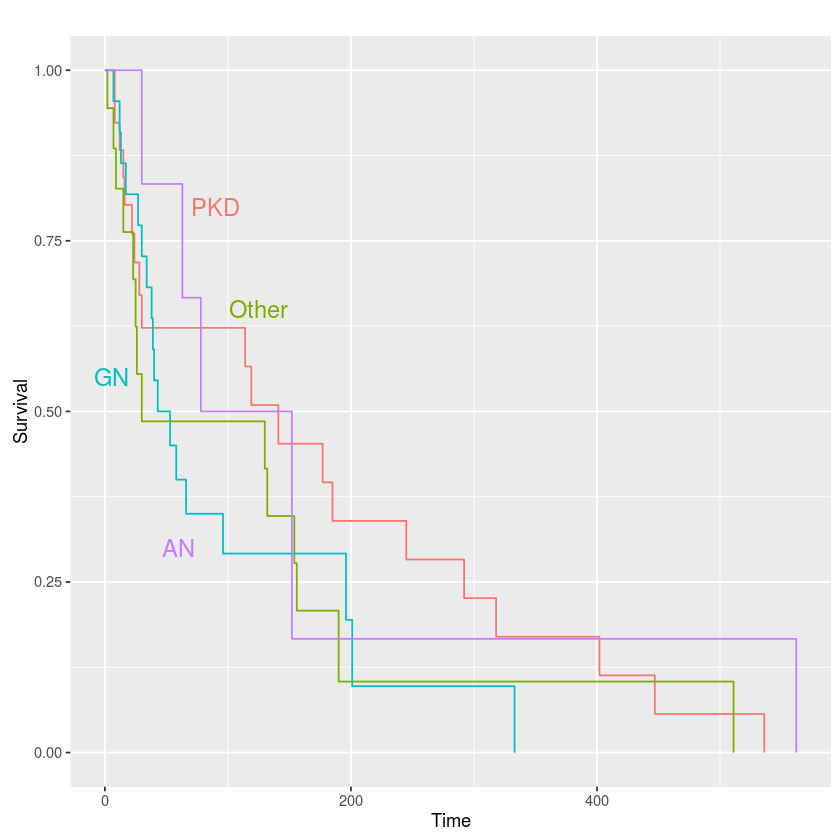

In [13]:
  # Zoom in to first 80 days
  pl.kid + ggplot2::coord_cartesian(xlim = c(0, 80), ylim = c(0.45, 1))

  # Add the diseases names to the plot and remove legend
  pl.kid +
    ggplot2::annotate(
      "text",
      label  = c("PKD", "Other", "GN", "AN"),
      x      = c(90, 125, 5, 60),
      y      = c(0.8, 0.65, 0.55, 0.30),
      size   = 5,
      colour = scales::hue_pal(
        h         = c(0, 360) + 15,
        c         = 100,
        l         = 65,
        h.start   = 0,
        direction = 1
      )(4)
    ) +
    ggplot2::guides(color = FALSE, linetype = FALSE)
